In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.1.0


In [0]:
! pip install --upgrade tensorflow

In [0]:
#Listing 2.1 Loading the MNIST dataset in Keras

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images[0]
#basically ya phala sa number ma convert ha tu isko tensor kahta ha is tamam value ki range 0 sa 255 ha qq ka  colr  ki ranges 255 ha 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
train_images[0].ndim

2

In [0]:
train_images[0].shape

(28, 28)

In [0]:
 train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
train_labels[0] #hamara jo labels ha wo 0 sa 9 tk ki range ma ha means 0 sa 9 tk ki class ha means 10 classes ha

5

In [0]:
#Listing 2.2 The network architecture
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
#Listing 2.3 The compilation step
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
#Listing 2.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28)) # yaha hum 3 dimension ko 2 dimension kar raha ha 60000 images wasa hi lakin row aur column ko multiply kar ka rows bana di ha
train_images = train_images.astype('float32') / 255 # 2dimensin ka baad human taamam values ko 1 range ma la means all values between 0 and 1
test_images = test_images.reshape((10000, 28 * 28)) # same kam testing ma hoga
test_images = test_images.astype('float32') / 255

train_images[0] # 0 sa 1 ki range ma agaye ha q ka normalize kiya ha data



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
#Listing 2.5 Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#basically to_categorical humara labels ki 1 hot encoding karta ha 

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2631 - accuracy: 0.9236
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1050 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0684 - accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0500 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0376 - accuracy: 0.9890


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.0741 - accuracy: 0.9781
test_acc: 0.9781


In [0]:
network.predict(test_images)

array([[3.86471743e-10, 1.77295537e-12, 6.79382506e-09, ...,
        9.99999285e-01, 2.10089079e-09, 7.64048877e-08],
       [3.37990025e-10, 5.25462747e-05, 9.99944329e-01, ...,
        1.70187038e-16, 1.58087900e-07, 4.60985082e-16],
       [2.66014752e-07, 9.98151720e-01, 3.15492689e-05, ...,
        9.33354546e-04, 7.06622319e-04, 6.07663969e-06],
       ...,
       [1.12138895e-13, 5.83908085e-13, 7.19837547e-13, ...,
        2.53969756e-06, 6.38417745e-08, 9.76288334e-07],
       [1.49271928e-09, 1.98663308e-11, 4.78469087e-12, ...,
        1.48849072e-10, 1.12595008e-04, 1.22592742e-10],
       [5.85447524e-11, 1.54481115e-16, 7.08242167e-13, ...,
        3.70079441e-16, 2.81845727e-12, 1.06198433e-14]], dtype=float32)

In [0]:
network.predict(test_images)[0]

array([3.8647174e-10, 1.7729554e-12, 6.7938251e-09, 5.7954543e-07,
       3.2767632e-12, 1.0165744e-08, 1.1065437e-15, 9.9999928e-01,
       2.1008908e-09, 7.6404888e-08], dtype=float32)

In [0]:
# load again dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

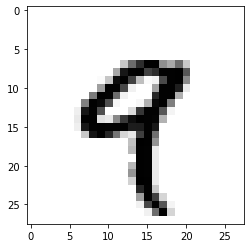

In [0]:
# Display the 4th digit image
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit , cmap=plt.cm.binary)
plt.show()


In [0]:
train_labels[4]

9